In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

# 데이터 1차 가공 함수(모든 버스)

In [9]:
# 종로구, 노원구 모든 버스 노선(중복 노선 제거)
station = ['100', '101', '1014', '102', '1020', '103', '104', '105', '106',
       '107', '108', '109', '110A고려대', '110B국민대', '140', '142', '143',
       '144', '150', '151', '152', '153', '160', '162', '171', '1711',
       '172', '173', '201', '2014', '2112', '2233', '260', '261', '262',
       '270', '271', '272', '273', '301', '370', '401', '402', '406',
       '420', '421', '470', '501', '600', '6002', '6005', '601', '6011',
       '602', '606', '6702', '700', '701', '7016', '7018', '7019', '7021',
       '7022', '7025', '702A서오릉', '702B용두초교', '704', '705', '707', '708',
       '710', '720', '721', '7211', '7212', '741', '752', '7730', '9401',
       '9403', '9701', '9703', '9709', '9714', 'N13', 'N15', 'N16', 'N26',
       'N30', 'N37', 'N62', '서대문08', '서대문11', '종로01', '종로02', '종로03',
       '종로05', '종로06', '종로07', '종로08', '종로09', '종로11', '종로12', '종로13','100', '1017', '102', '103',
 '105', '1120', '1122', '1129', '1130',
       '1131', '1132', '1133', '1135', '1136', '1137', '1138', '1139',
       '1140', '1141', '1142', '1143', '1144', '1154', '1155', '1156',
       '1167', '1221', '1222', '1224', '1227', '146', '147', '172', '173',
       '202', '2113', '2114', '261', '6011', '6100', '6101', 'N13', 'N61',
       '노원01', '노원02', '노원03', '노원04', '노원05', '노원08', '노원09', '노원11',
       '노원13', '노원14', '노원15', '도봉09', '성북14-1']
station = list(set(station))

In [7]:
def fine_data_all(raw_data) :
    # 노선 리스트만 뽑아내기
    nosun_list = list(raw_data.노선번호)
    nosun_list = set(nosun_list)

    # 필요없는 열 삭제
    data = raw_data
    data = data.iloc[:,1:10]
    data.head()

    all_data = data[data['노선번호'].isin(station)]
    all_data.reset_index(inplace =True)
    del all_data["index"]

    # 필요한 데이터만 뽑기
    allbus = all_data[["노선번호","버스정류장ARS번호","역명","승차총승객수","하차총승객수"]]

    # 컬럼명 유민이 데이터랑 동일하게 변경
    allbus = allbus.rename(columns = {'버스정류장ARS번호': 'ARS-ID',
                                            '노선번호':'노선명',
                                            '역명':'정류소명',
                                            '승차총승객수':'승차',
                                            '하차총승객수':'하차',
                                            '승하차총승객수':'승하차'})
    
    return allbus

# 데이터 정제 과정

In [5]:
# 데이터 읽어오기
raw_data_1 = pd.read_csv('../data/버스데이터/BUS_STATION_BOARDING_MONTH_201901.csv')
raw_data_2 = pd.read_csv('../data/버스데이터/BUS_STATION_BOARDING_MONTH_201902.csv')
raw_data_3 = pd.read_csv('../data/버스데이터/BUS_STATION_BOARDING_MONTH_201903.csv')

In [11]:
# 모든 버스 데이터 가공하기
all_1 = fine_data_all(raw_data_1)
all_2 = fine_data_all(raw_data_2)
all_3 = fine_data_all(raw_data_3)
                      
all_total = pd.concat([all_1,all_2,all_3])
all_total['승하차'] = all_total['승차'] + all_total['하차']
all_total.head()

,노선명,ARS-ID,정류소명,승차,하차,승하차
0,106,61036,호원고교.호암초교,72,27,99
1,N62,07197,중화중학교,0,7,7
2,106,10001,도봉산역,114,140,254
3,1132,11135,우방아파트,223,181,404
4,106,61003,중앙초등학교,1,95,96


In [7]:
all_total2 = all_total.groupby(['정류소명']).sum().reset_index()
all_total2

,정류소명,승차,하차,승하차
0,14단지상가,29465,29556,59021
1,2001아울렛중계점,4091,7979,12070
2,202번종점,8873,20459,29332
3,24시편의점,18928,26087,45015
4,63빌딩.가톨릭대학교여의도성모병원,120843,78494,199337
5,65사단앞,4774,1186,5960
6,72보병사단,5034,3744,8778
7,7단지영업소,10913,8730,19643
8,7단지영업소(가상),682,1729,2411
9,7호선노원역,44254,20967,65221


# 버스 노선 및 정류장 선정

In [8]:
def bus_line_graph2(*bus) :
    df = all_total2[all_total2['정류소명'].isin(list(bus))]
    df = df.groupby('정류소명').sum()
    df.sort_values('승차').plot(kind='barh',grid=True,figsize=(10,10))
    plt.title('버스 정류소별 승하차 인원')
    plt.show()

In [18]:
# 종로구 최종 노선
all_total.loc[all_total.노선명.isin(['종로03','종로07','종로08','종로12']),:].groupby('노선명').sum()[['승하차']].sort_values('승하차',ascending=False)

,승하차
노선명,
종로08,1570471
종로03,1194445
종로12,399540
종로07,52698


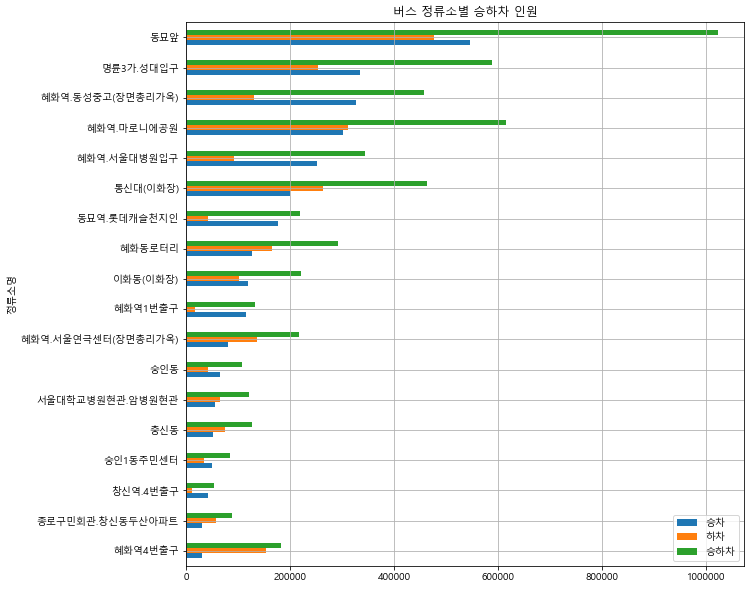

In [24]:
# 종로구 최종 버스 정류소 
bus_line_graph2('혜화동로터리','혜화역.동성중고(장면총리가옥)','혜화역.서울연극센터(장면총리가옥)','혜화역4번출구','혜화역1번출구',
                '명륜3가.성대입구','혜화역3번출구','혜화역.서울대병원입구','혜화역.마로니에공원','서울대학교병원현관.암병원현관',
                '통신대(이화장)','이화동(이화장)','충신동','충신동','창신역.4번출구','숭인1동주민센터','동묘역.롯데캐슬천지인','종로구민회관.창신동두산아파트','동묘앞','숭인동')

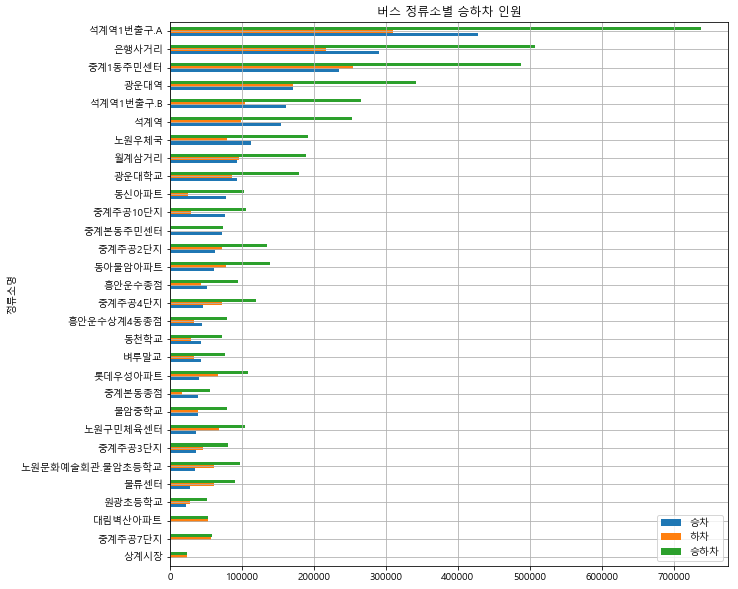

In [28]:
# 노원구 최종 버스 정류소
bus_line_graph2(
'상계시장','동아불암아파트','흥안운수종점','흥안운수상계4동종점',
'중계1동주민센터','중계주공4단지','중계주공2단지','중계주공3단지','원광초등학교',
'노원구민체육센터','은행사거리','노원문화예술회관.불암초등학교','중계본동주민센터','대림벽산아파트','불암중학교','롯데우성아파트','중계주공10단지','중계주공7단지','노원우체국','중계본동종점','동천학교',
'벼루말교','광운대학교','월계삼거리','광운대역','동신아파트','물류센터','석계역','석계역1번출구.A','석계역1번출구.B')